In [1]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import sympy as sm
import sympy.physics.mechanics as me
from ConditionalDynamic import *
from tqdm import tqdm

### 系统建模

In [2]:
l, w, h, m, g = sm.symbols("l, w, h, m, g")
x, y, z, psi, theta, phi = me.dynamicsymbols("x, y, z, psi, theta, phi")
x_d, y_d, z_d, psi_d, theta_d, phi_d = me.dynamicsymbols("x, y, z, psi, theta, phi", 1)
v1, v2, v3, u1, u2, u3 = me.dynamicsymbols("v1, v2, v3, u1, u2, u3")
v1_d, v2_d, v3_d, u1_d, u2_d, u3_d = me.dynamicsymbols("v1, v2, v3, u1, u2, u3", 1)

### 运动学

In [3]:
N = me.ReferenceFrame("N")
O = me.Point("O")
O.set_vel(N, 0)
R = N.orientnew("R", "Body", [psi, theta, phi], "313")
P = O.locatenew("P", x*N.x+y*N.y+z*N.z)
P.set_vel(R, 0)
P.set_vel(N, x_d*N.x+y_d*N.y+z_d*N.z)
A = P.locatenew("A", -sm.Rational(1, 2)*(l*R.y+w*R.x+h*R.z))
B = A.locatenew("B", w*R.x)
C = B.locatenew("C", l*R.y)
D = A.locatenew("D", l*R.y)
E = A.locatenew("E", h*R.z)
F = B.locatenew("F", h*R.z)
G = C.locatenew("G", h*R.z)
H = D.locatenew("H", h*R.z)
display(A.v2pt_theory(P, N, R))
display(B.v2pt_theory(A, N, R))
display(C.v2pt_theory(A, N, R))
display(D.v2pt_theory(A, N, R))
display(E.v2pt_theory(A, N, R))
display(F.v2pt_theory(A, N, R))
display(G.v2pt_theory(A, N, R))
display(P.v2pt_theory(A, N, R))

x'*N.x + y'*N.y + z'*N.z + (-h*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2 + l*(cos(theta)*psi' + phi')/2)*R.x + (h*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 - w*(cos(theta)*psi' + phi')/2)*R.y + (-l*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 + w*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2)*R.z

x'*N.x + y'*N.y + z'*N.z + (-h*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2 + l*(cos(theta)*psi' + phi')/2)*R.x + (h*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 + w*(cos(theta)*psi' + phi')/2)*R.y + (-l*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 - w*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2)*R.z

x'*N.x + y'*N.y + z'*N.z + (-h*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2 - l*(cos(theta)*psi' + phi')/2)*R.x + (h*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 + w*(cos(theta)*psi' + phi')/2)*R.y + (l*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 - w*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2)*R.z

x'*N.x + y'*N.y + z'*N.z + (-h*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2 - l*(cos(theta)*psi' + phi')/2)*R.x + (h*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 - w*(cos(theta)*psi' + phi')/2)*R.y + (l*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 + w*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2)*R.z

x'*N.x + y'*N.y + z'*N.z + (h*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2 + l*(cos(theta)*psi' + phi')/2)*R.x + (-h*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 - w*(cos(theta)*psi' + phi')/2)*R.y + (-l*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 + w*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2)*R.z

x'*N.x + y'*N.y + z'*N.z + (h*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2 + l*(cos(theta)*psi' + phi')/2)*R.x + (-h*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 + w*(cos(theta)*psi' + phi')/2)*R.y + (-l*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 - w*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2)*R.z

x'*N.x + y'*N.y + z'*N.z + (h*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2 - l*(cos(theta)*psi' + phi')/2)*R.x + (-h*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 + w*(cos(theta)*psi' + phi')/2)*R.y + (l*(sin(phi)*sin(theta)*psi' + cos(phi)*theta')/2 - w*(-sin(phi)*theta' + sin(theta)*cos(phi)*psi')/2)*R.z

x'*N.x + y'*N.y + z'*N.z

### 动力学

In [4]:
I = sm.Rational(1, 12)*m*(me.outer(R.x, R.x)*(l**2+h**2)+me.outer(R.y, R.y)*(w**2+h**2)+me.outer(R.z, R.z)*(l**2+w**2))
Body = me.RigidBody("Body", P, R, m, (I, P))
BodyList = [Body]
ForceList = [(P, -m*g*N.z)]
display(I.to_matrix(R))

Matrix([
[m*(h**2 + l**2)/12,                  0,                  0],
[                 0, m*(h**2 + w**2)/12,                  0],
[                 0,                  0, m*(l**2 + w**2)/12]])

In [5]:
T = me.kinetic_energy(N, Body)
kane = me.KanesMethod(
    N, 
    q_ind = [x, y, z, psi, theta, phi], 
    u_ind = [v1, v2, v3, u1, u2, u3], 
    kd_eqs = [x_d-v1, y_d-v2, z_d-v3, psi_d-u1, theta_d-u2, phi_d-u3]
)
f, f_star = kane.kanes_equations(ForceList, BodyList)

d:\python\python37\lib\site-packages\sympy\physics\mechanics\kane.py:539: SymPyDeprecationWarning: 

The kanes_equation() argument order has been deprecated since SymPy
1.1. Use switched argument order to update your code, For example:
kanes_equations(loads, bodies) > kanes_equations(bodies, loads).
instead. See https://github.com/sympy/sympy/issues/10945 for more
info.  The API for kanes_equations() has changed such that the loads
(forces and torques) are now the second argument and is optional with
None being the default.

  issue=10945, deprecated_since_version="1.1").warn()


### 系统参数

In [6]:
cons = {l: 1, w: 1, h: 1, m: 1, g: 9.8}
eta = 0.8

### 二阶加速度

In [7]:
sys = sm.solve((f+f_star).subs(cons), [v1_d, v2_d, v3_d, u1_d, u2_d, u3_d])
display(sys)

{Derivative(v1(t), t): 0.0,
 Derivative(v2(t), t): 0.0,
 Derivative(v3(t), t): -9.80000000000000,
 Derivative(u1(t), t): -(u1(t)*cos(theta(t)) - u3(t))*u2(t)/sin(theta(t)),
 Derivative(u2(t), t): -u1(t)*u3(t)*sin(theta(t)),
 Derivative(u3(t), t): (u1(t) - u3(t)*cos(theta(t)))*u2(t)/sin(theta(t))}

### 多阶段建模

In [8]:
def dynamic(t, s):
    params = {theta: s[4], u1: s[9], u2: s[10], u3: s[11]}
    return np.array([
        s[6], s[7], s[8], s[9], s[10], s[11], 
        sys[v1_d].subs(params), 
        sys[v2_d].subs(params), 
        sys[v3_d].subs(params), 
        sys[u1_d].subs(params), 
        sys[u2_d].subs(params), 
        sys[u3_d].subs(params)
    ])

In [9]:
def event(t, s):
    params = {
        x: s[0], y: s[1], z: s[2], 
        psi: s[3], theta: s[4], phi: s[5], 
        x_d: s[6], y_d: s[7], z_d: s[8], 
        psi_d: s[9], theta_d: s[10], phi_d: s[11]
    }
    buttom = min(
        [A, B, C, D, E, F, G, H], 
        key = lambda p: me.dot(p.pos_from(O), N.z).subs(cons).subs(params)
    )
    return -me.dot(buttom.pos_from(O), N.z).subs(cons).subs(params).evalf()

In [10]:
def trans(t, s):
    v1new, v2new, v3new, u1new, u2new, u3new = me.dynamicsymbols(
        "v1new, v2new, v3new, u1new, u2new, u3new"
    )
    d_old = {
        x: s[0], y: s[1], z: s[2], 
        psi: s[3], theta: s[4], phi: s[5], 
        x_d: s[6], y_d: s[7], z_d: s[8], 
        psi_d: s[9], theta_d: s[10], phi_d: s[11]
    }
    d_new = {
        x: s[0], y: s[1], z: s[2], 
        psi: s[3], theta: s[4], phi: s[5], 
        x_d: v1new, y_d: v2new, z_d: v3new, 
        psi_d: u1new, theta_d: u2new, phi_d: u3new
    }
    buttom = min(
        [A, B, C, D, E, F, G, H], 
        key = lambda p: me.dot(p.pos_from(O), N.z).subs(cons).subs(d_old)
    )
    Tx = T.diff(x_d).subs(cons)
    Ty = T.diff(y_d).subs(cons)
    Tpsi = T.diff(psi_d).subs(cons)
    Ttheta = T.diff(theta_d).subs(cons)
    Tphi = T.diff(phi_d).subs(cons)
    dz = me.dot(buttom.pos_from(O), N.z).subs(cons).diff()
    Eq = [
        Tx.subs(d_new) - Tx.subs(d_old), 
        Ty.subs(d_new) - Ty.subs(d_old), 
        Tpsi.subs(d_new) - Tpsi.subs(d_old), 
        Ttheta.subs(d_new) - Ttheta.subs(d_old), 
        Tphi.subs(d_new) - Tphi.subs(d_old), 
        dz.subs(d_new) + eta*dz.subs(d_old)
    ]
    sol = sm.solve(Eq, [v1new, v2new, v3new, u1new, u2new, u3new])
    return np.array([
        s[0], s[1], s[2], s[3], s[4], s[5], 
        sol[v1new].evalf(), sol[v2new].evalf(), sol[v3new].evalf(), 
        sol[u1new].evalf(), sol[u2new].evalf(), sol[u3new].evalf()
    ])

In [11]:
dyn = ConditionalDynamic(dynamic, event, trans)

### 仿真

In [12]:
x0 = np.array([0., 0., 10., 1., 2., 3., 1., 1., 0., 3., 2., 1.])
t_span = [0, 5]
res = dyn.run(x0, t_span)

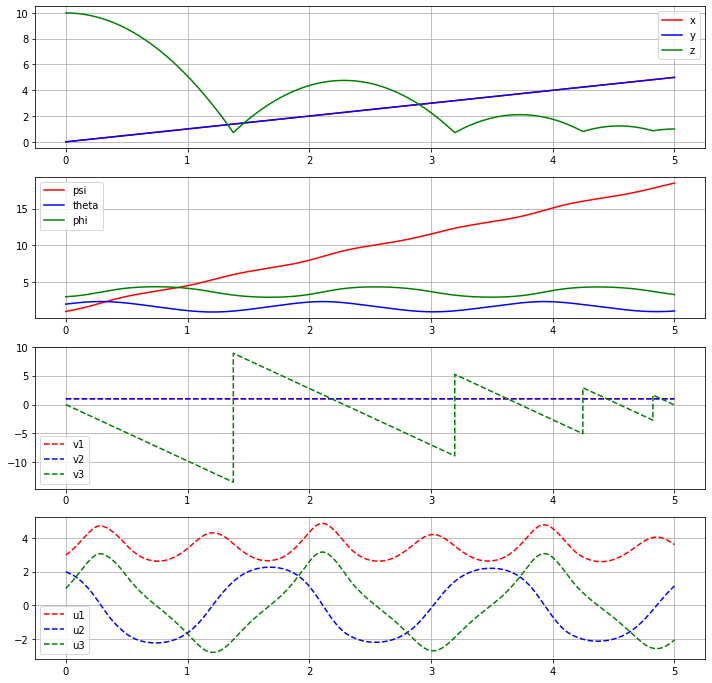

In [13]:
plt.figure(figsize = (12, 12))
plt.subplot(4, 1, 1)
plt.plot(res[0], res[1][0, :], "r-", label = "x")
plt.plot(res[0], res[1][1, :], "b-", label = "y")
plt.plot(res[0], res[1][2, :], "g-", label = "z")
plt.legend()
plt.grid()
plt.subplot(4, 1, 2)
plt.plot(res[0], res[1][3, :], "r-", label = "psi")
plt.plot(res[0], res[1][4, :], "b-", label = "theta")
plt.plot(res[0], res[1][5, :], "g-", label = "phi")
plt.legend()
plt.grid()
plt.subplot(4, 1, 3)
plt.plot(res[0], res[1][6, :], "r--", label = "v1")
plt.plot(res[0], res[1][7, :], "b--", label = "v2")
plt.plot(res[0], res[1][8, :], "g--", label = "v3")
plt.legend()
plt.grid()
plt.subplot(4, 1, 4)
plt.plot(res[0], res[1][9, :], "r--", label = "u1")
plt.plot(res[0], res[1][10, :], "b--", label = "u2")
plt.plot(res[0], res[1][11, :], "g--", label = "u3")
plt.legend()
plt.grid()
plt.show()

### 生成动画

In [14]:
traces = {}
for p in [A, B, C, D, E, F, G, H]:
    traces[p] = {"x": [], "y": [], "z": []}
    px = p.pos_from(O).dot(N.x).subs(cons)
    py = p.pos_from(O).dot(N.y).subs(cons)
    pz = p.pos_from(O).dot(N.z).subs(cons)
    for x_i, y_i, z_i, psi_i, theta_i, phi_i in tqdm(zip(
        res[1][0, :], res[1][1, :], res[1][2, :], 
        res[1][3, :], res[1][4, :], res[1][5, :]
    )):
        pdict = {
            x: x_i, y: y_i, z: z_i, 
            psi: psi_i, theta: theta_i, phi: phi_i
        }
        traces[p]["x"].append(px.subs(pdict))
        traces[p]["y"].append(py.subs(pdict))
        traces[p]["z"].append(pz.subs(pdict))
    traces[p]["x"] = np.array(traces[p]["x"])
    traces[p]["y"] = np.array(traces[p]["y"])
    traces[p]["z"] = np.array(traces[p]["z"])

4999it [01:16, 65.19it/s]
4999it [01:17, 64.92it/s]
4999it [01:17, 64.51it/s]
4999it [01:17, 64.27it/s]
4999it [01:17, 64.27it/s]
4999it [01:17, 64.33it/s]
4999it [01:17, 64.18it/s]
4999it [01:18, 64.06it/s]


In [15]:
def datas(i):
    points = []
    for axis in "xyz":
        points.append([])
        for p in [A, B, C, D, E, F, G, H]:
            points[-1].append(traces[p][axis][i*100])
    lines = []
    for axis in "xyz":
        lines.append([])
        for p in [A, B, C, D, H, G, F, E, A, F, B, E, H, C, G, D, A]:
            lines[-1].append(traces[p][axis][i*100])
    return np.array(points), np.array(lines)

In [16]:
def update(i):
    ps, ls = datas(i)
    points.set_data(ps[0], ps[1])
    points.set_3d_properties(ps[2], "z")
    lines.set_data(ls[0], ls[1])
    lines.set_3d_properties(ls[2], "z")
    return points, lines, 

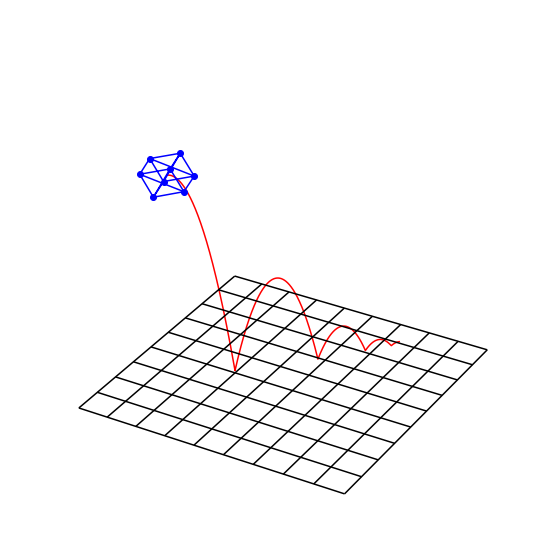

MovieWriter ffmpeg unavailable; using Pillow instead.


In [17]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.plot3D(res[1][0, :], res[1][1, :], res[1][2, :], "r-")
X, Y = np.meshgrid(
    np.linspace(-2, 7, 10, endpoint = True), 
    np.linspace(-2, 7, 10, endpoint = True)
)
Z = np.zeros(shape = X.shape)
ax.plot_wireframe(X, Y, Z, color = "k")
points, = ax.plot([], [], [], "bo")
lines, = ax.plot([], [], [], "b-")
ax.axis("off")
ani = anim.FuncAnimation(fig, update, frames = len(res[0])//100, interval = 100, blit = True)
plt.show()
ani.save("example3.gif", fps = 10)